<a href="https://colab.research.google.com/github/deshmukhneha595/deshmukhneha595/blob/main/ML_LAB5_T1_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LAB5 : Implement K-nearest neighbors for classification

Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Import Dataset

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#Assign column names to the dataset
names = ['sepal-length','sepal-width','petal-length','petal-width','Class']

#Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

Data Analysis EDA

In [10]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
dataset.shape

(150, 5)

In [12]:
dataset.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

Data Preprocessing

In [16]:
# step 1: Separate input and output variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


Step 3: Splitting the dataset into the Training Set and Testing Set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [18]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Step 5 : Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [20]:
print(X_test)

[[-0.04576165 -0.81179793  0.1179551   0.03801261]
 [ 0.31237303 -1.03169805  1.076634    0.29867054]
 [-0.04576165 -0.59189782  0.79466962  1.60196018]
 [-1.71705682  0.28770265 -1.34825969 -1.26527703]
 [ 1.62553351  1.16730313  1.35859839  1.73228915]
 [-1.12016569 -1.47149829 -0.22040216 -0.22264531]
 [-1.12016569 -0.15209758 -1.29186681 -1.26527703]
 [ 0.07361657  0.28770265  0.62549099  0.8199864 ]
 [-1.00078746 -0.15209758 -1.17908106 -1.26527703]
 [-0.52327456 -0.15209758  0.45631236  0.42899951]
 [-0.28451811 -0.15209758  0.45631236  0.42899951]
 [ 0.55112948 -0.59189782  0.79466962  0.42899951]
 [ 1.50615529 -0.15209758  1.24581263  1.21097329]
 [ 1.74491174 -0.3719977   1.47138414  0.8199864 ]
 [-1.00078746  0.72750289 -1.17908106 -1.0046191 ]
 [-0.88140924  0.50760277 -1.12268818 -0.87429013]
 [ 0.55112948 -0.81179793  0.68188387  0.8199864 ]
 [ 1.86428996 -0.59189782  1.35859839  0.95031536]
 [-0.88140924  1.38720324 -1.23547394 -1.0046191 ]
 [-1.23954391 -0.15209758 -1.29

Training the KNN model on the Training set

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(
    n_neighbors=9,
    p=2,
    metric='minkowski')
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

Predict the Test set results

In [22]:
y_pred=classifier.predict(X_test)
print(np.concatenate((
    y_pred.reshape(len(y_pred),1),
    y_test.reshape(len(y_test),1)),
1))

[['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versi

Evaluating the Algorithm

♦Making the Confusion Matrix & predicting accuracy score:

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test,y_pred) * 100
print('Accuracy of our model is equal' + 
      str(round(accuracy, 2)) + '%.')

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]
Accuracy of our model is equal93.33%.


Making Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



Comparing Error Rate with K value

Parameter Tuning using

cross-validation for parameter tuning:

In [25]:
from sklearn.model_selection import cross_val_score

#creating list of K for KNN
k_list = list(range(1,50))

#creating empty list of cv scores
cv_scores=[]

#perform 10-fold cross validation
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train,
                           y_train,
                           cv=10,
                           scoring = 'accuracy')
  cv_scores.append(scores.mean())

In [26]:
print(cv_scores)

[0.9666666666666666, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.95, 0.95, 0.9583333333333334, 0.9666666666666666, 0.975, 0.9666666666666666, 0.975, 0.975, 0.975, 0.9666666666666666, 0.9666666666666666, 0.9666666666666666, 0.9583333333333333, 0.9583333333333333, 0.9666666666666666, 0.9583333333333333, 0.9333333333333333, 0.9333333333333333, 0.925, 0.925, 0.9083333333333332, 0.9, 0.9083333333333332, 0.9166666666666666, 0.8999999999999998, 0.9083333333333332, 0.8999999999999998, 0.8999999999999998, 0.875, 0.875, 0.875, 0.875, 0.875, 0.85, 0.8583333333333334, 0.8583333333333334, 0.8666666666666666, 0.8416666666666668, 0.8416666666666668, 0.8416666666666668, 0.8416666666666668, 0.8416666666666668, 0.8583333333333334, 0.85]


<Figure size 640x480 with 0 Axes>

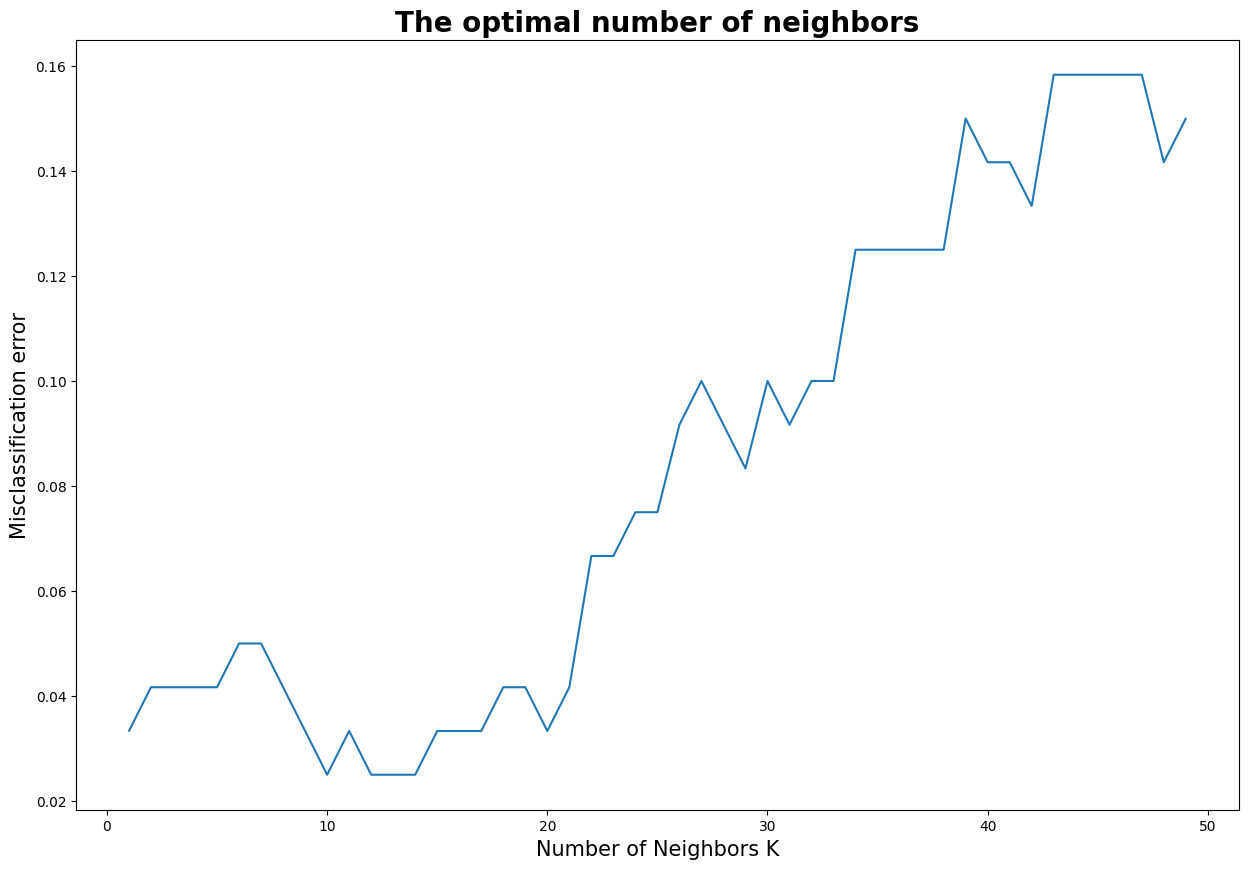

In [27]:
import seaborn as sns
# changing to misclassification error
MSE = [1-x for x in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors',
          fontsize=20, fontweight= 'bold')
plt.xlabel('Number of Neighbors K', fontsize =15)
plt.ylabel('Misclassification error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [28]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d."
      % best_k)

The optimal number of neighbors is 10.


<ipython-input-29-888fc6ca8aa4>:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl,1],c=cmap(idx),marker=markers[idx],label=cl)


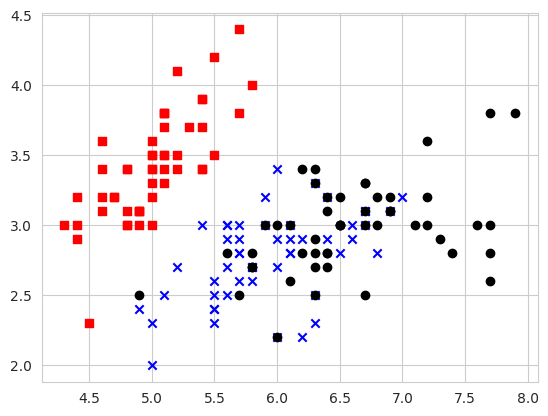

In [29]:
from matplotlib.colors import ListedColormap
markers = ('s','x','o')
colors = ('red', 'blue', 'black')
cmap = ListedColormap(colors[:len(np.unique(y_test))])

for idx,cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0],y=X[y == cl,1],c=cmap(idx),marker=markers[idx],label=cl)